In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 6 . keras를 이용한 인공 신경망

## 6.1 인공 신경망

### 6.1.1 패션 MNIST

In [ ]:
# 6.1.1.1 keras에서 MNIST 데이터 적재

from tensorflow import keras
(train_input, train_target),(test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# 6.1.1.2 패션 MNIST 데이터 크기 
print ('train :', train_input.shape, train_target.shape)
print ('test  :', test_input.shape,  test_target.shape)

train : (60000, 28, 28) (60000,)
test  : (10000, 28, 28) (10000,)


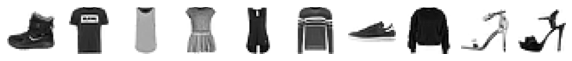

In [ ]:
# 6.1.1.3 첫 10개 이미지 출력
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10,10))
for i, axe in enumerate(axs.flat) :
  axe.imshow(train_input[i], cmap = 'gray_r')
  axe.axis('off')

plt.show()

In [ ]:
# 6.1.1.4 첫 10개 정답 레이블 
print ([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
# 6.1.1.5 정답 레이블의 분포 확인
import numpy as np
print (np.unique(train_target, return_counts=True))

# 각 카테마다 6000개씩 있음

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


### 6.1.2 로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
# 6.1.2.1  데이터의 정규화 (0~1) 및 1차원 배열로 정리
train_scaled = train_input / 255
train_scaled = train_scaled.reshape(-1, 28*28)
train_input.shape, train_scaled.shape

((60000, 28, 28), (60000, 784))

In [ ]:
# 6.1.2.2 확률적 경사하강법을 이용하여 학습 후 정확도 확인
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log', max_iter = 5, random_state = 42)   #손실함수 log
scores = cross_validate(sc, train_scaled , train_target, n_jobs= -1)
print (np.mean(scores['test_score']))

0.8195666666666668


In [ ]:
# 6.1.2.3 최대 반복수를 9회로 증가시켜 학습
sc = SGDClassifier(loss = 'log', max_iter = 9, random_state = 42)
scores = cross_validate(sc, train_scaled , train_target, n_jobs= -1)
print (np.mean(scores['test_score']))

0.8329166666666665


SGDClassifier(loss='log', max_iter=9, random_state=42)

In [ ]:
# 6.1.2.4 최대 반복수를 20회로 증가시켜 학습
sc = SGDClassifier(loss = 'log', max_iter = 20, random_state = 42)
scores = cross_validate(sc, train_scaled , train_target, n_jobs= -1)
print (np.mean(scores['test_score']))

0.8349791666666666


### 6.1.3 인공 신경망

In [ ]:
# 6.1.3.1 tensorflow import
import tensorflow as tf

In [ ]:
# 6.1.3.2 keras import
from tensorflow import keras

### 6.1.4 인공 신경망으로 모델 만들기

In [ ]:
# 6.1.4.1 검증 데이터 분리
from  sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2 , random_state = 42
)


In [ ]:
# 6.1.4.2 분리 데이터 중 훈련데이터 
print (train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
# 6.1.4.3 분리 데이터 중 검증 데이터 
print (val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [ ]:
# 6.1.4.4 계층 정의 (밀집층)
dense =keras.layers.Dense(10, activation ='softmax', input_shape = (784,))

In [ ]:
# 6.1.4.5 계층을 신경망에 추가
model =keras.Sequential (dense)

### 6.1.5 인공 신경망으로 패션 아이템 분류하기

In [ ]:
# 6.1.5.1 모델 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# 6.1.5.2 타깃 레이블 확인
print ( train_target[:10])

[7 3 5 8 6 9 3 3 9 9 3 2 1 7 8 1 9 7 0 0 9 8 0 6 3 9 8 1 5 3 4 7 9 6 4 8 7
 3 5 4 1 0 2 0 1 0 3 2 2 9 9 9 1 3 9 4 7 1 3 7 1 7 4 1 0 6 3 0 0 1 9 6 9 1
 2 9 7 4 9 5 3 9 9 6 1 5 0 0 1 1 3 8 3 1 3 4 5 3 9 0]


In [ ]:
# 6.1.5.3 모델 학습
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6051 - accuracy: 0.7940
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4767 - accuracy: 0.8388
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4577 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4441 - accuracy: 0.8523
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4382 - accuracy: 0.8556


In [ ]:
# 6.1.5.4 학습 결과 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4496 - accuracy: 0.8492


[0.4496214687824249, 0.8491666913032532]

## 6.2 심층 신경망

### 6.2.1 2개의 층

In [ ]:
# 6.2.1.1 패션 MNIST 데이터 적재
from tensorflow import keras
(train_input, train_target),(test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()

In [ ]:
# 6.2.1.2 학습 데이터 준비 ( 정규화, 입력데이터 형상 변경, 검증데이터 분리)
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28* 28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42
)

In [ ]:
# 6.2.1.3 은닉층, 출력층 생성
dense1 = keras.layers.Dense( 100, activation ='sigmoid' , input_shape = (784, ))
dense2 = keras.layers.Dense( 10, activation ='softmax')

### 6.2.2 심층 신경망 만들기

In [ ]:
# 6.2.2.1 신경망 구성
model= keras.Sequential([dense1, dense2])

In [ ]:
# 6.2.2.2 모델 정보 확인
model. summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 6.2.2.3 모델명, 계층명 지정하여 레이어와 함께 선언하는 방법

model = keras.Sequential([
              keras.layers.Dense(100, activation='sigmoid', input_shape= (784,),
                                 name = 'hidden'),
              keras.layers.Dense(10, activation = 'softmax', name = 'output')
], name = 'Fashion MNIST Model')

In [ ]:
# 6.2.2.4 모델명, 계층명이 지정된 정보 확인
model.summary()

Model: "Fashion MNIST Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### 6.2.3 층을 추가하는 다른 방법

In [ ]:
# 6.2.3.1 Sequential 에 add 메소드로 추가하는 방식

model = keras.Sequential()
model.add (keras.layers.Dense(100,activation='sigmoid', input_shape = (784,), 
                              name = 'hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name = 'output'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 6.2.3.2 2층 모델 설정 및 훈련
model.compile(loss ='sparse_categorical_crossentropy', metrics ='accuracy')
model.fit(train_scaled, train_target, epochs =5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5627 - accuracy: 0.8075
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4079 - accuracy: 0.8535
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3739 - accuracy: 0.8655
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3526 - accuracy: 0.8734
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3355 - accuracy: 0.8794


In [ ]:
# 6.2.3.3 2층 모델 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3500 - accuracy: 0.8743


[0.3499526083469391, 0.8743333220481873]

* 단층 신경망 보다 2층 신경망이 되면서 성능이 개선 되었다. ( 검증 데이터 기준 : 0.8448  --> 0.8752 )

### 6.2.4 ReLU 함수

In [ ]:
# 6.2.4.1 모델의 개선
#   Flatten : 입력데이터를 1차원 배열로 변환
#   은닉층 활성화 함수 : sigmoid --> relu로 변경

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape =(28,28)))
model.add(keras.layers.Dense(100,activation ='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 6.2.4.2 패션 MNIST 데이터 재적재 ( 입력 모양 변경은 제외, 정규화는 수행)

(train_input, train_target), (test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()

train_scaled =train_input /255.0
train_scaled, val_scaled, train_target, val_target =train_test_split(
    train_scaled, train_target, test_size=0.2, random_state =42
)

In [ ]:
# 6.2.4.3 ReLU 활성화 도입한 2층 모델 설정 및 학습 
model.compile (loss ='sparse_categorical_crossentropy', metrics ='accuracy')
model.fit(train_scaled, train_target, epochs =5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5399 - accuracy: 0.8112
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3948 - accuracy: 0.8592
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3552 - accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3353 - accuracy: 0.8801
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3201 - accuracy: 0.8858


In [ ]:
6 7.2.4.4 ReLU 활성화 도입한 2층 모델 평가 
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3858 - accuracy: 0.8704


[0.38578274846076965, 0.8704166412353516]

* 단층 신경망 : 훈련 0.8544,   검증 0.8448
* 2층 신경망 (은닉층 활성화 sigmoid) : 훈련 0.8795, 검증 0.8752
* 2층 신경망 (은닉층 활성화 ReLU) : 훈련 0.8848,  검증 0.8747

### 6.2.5 옵티마이저

In [ ]:
# 6.2.5.1 모델 정의 
model= keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# 6.2.5.2 학습 모델 설정에서 optimizer를 'adam'으로 지정
#  기본값은 'rmsprop'
model.compile (optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy',
               metrics = 'accuracy')
model.fit (train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5296 - accuracy: 0.8119
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3908 - accuracy: 0.8597
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3547 - accuracy: 0.8729
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3339 - accuracy: 0.8816
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3189 - accuracy: 0.8853


In [ ]:
# 6.2.5.3 학습 알고리즘 'adam'  2층망 훈련 결과 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3783 - accuracy: 0.8708


[0.3782922327518463, 0.8708333373069763]

* 단층 신경망 : 훈련 0.8544,   검증 0.8448
* 2층 신경망 (은닉층 활성화 sigmoid) : 훈련 0.8795, 검증 0.8752
* 2층 신경망 (은닉층 활성화 ReLU) : 훈련 0.8848,  검증 0.8747
* 2층 신경망 (학습 알고리즘 adam) : 훈련 0.8858, 검증 0.8765

## 6.3 신경망 모델 훈련

###  6.3.1 손실곡선

In [1]:
# 6.3.1.1 패션 MNIST 데이터 준비
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# 6.3.1.2 신경망 모델을 간단하게 생성하는 함수 제작
def model_fn(a_layer = None) :
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add (keras.layers.Dense(100, activation = 'relu'))
  if a_layer :
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [ ]:
# 6.3.1.3 모델을 하나 생성하고, 요약 정보 확인
model = model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 6.3.1.4 모델 환경을 설정하고, 훈련 수행. 수행 과정의 정보를 history에 저장
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit( train_scaled, train_target, epochs=5, verbose = 0)   #verbose = 0 진행과정 안보임
history

In [ ]:
history.history

{'accuracy': [0.8914374709129333,
  0.8929166793823242,
  0.898562490940094,
  0.9011041522026062,
  0.9039583206176758],
 'loss': [0.3056570291519165,
  0.2969316244125366,
  0.2864905893802643,
  0.27914175391197205,
  0.2726122736930847]}

In [ ]:
# 6.3.1.5 훈련 결과 history 에 담긴 항목 확인 
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
# 6.3.1.6 epoch 별 손실과 정확도 반환
print(history.history.items())

dict_items([('loss', [0.5269349813461304, 0.3899177312850952, 0.35380902886390686, 0.3340804874897003, 0.3170988857746124]), ('accuracy', [0.8129374980926514, 0.8598750233650208, 0.8723750114440918, 0.8809999823570251, 0.8873541951179504])])


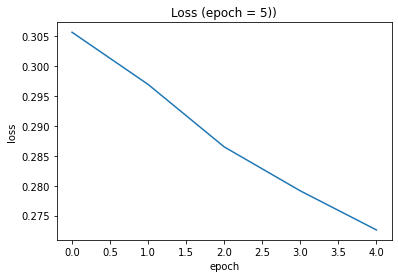

In [ ]:
# 6.3.1.7 epoch 별 손실 감소 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title ('Loss (epoch = 5))')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

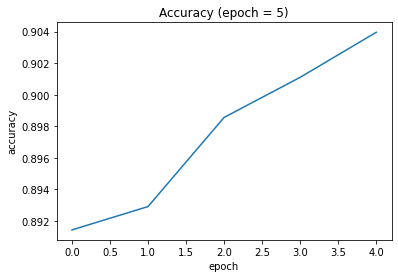

In [ ]:
# 6.3.1.8 epoch 별 정확도 향상 시각화
plt.plot(history.history['accuracy'])
plt.title ('Accuracy (epoch = 5)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 6.3.1.9 epochs = 20 으로 수행한 훈련 
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit (train_scaled, train_target,epochs= 20, verbose = 0)

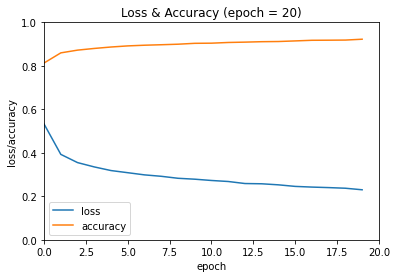

In [ ]:
# 6.3.1.10 epoch = 20 으로 수행한 훈련 결과 시각화 
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title ('Loss & Accuracy (epoch = 20)')
plt.xlabel('epoch')
plt.ylabel('loss/accuracy')
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend(['loss', 'accuracy'])
plt.show()

### 6.3.2 검증 손실

In [ ]:
# 6.3.2.1 훈련 시 검증 데이터를 패러미터로 전달하여 검증데이터의 epoch 별 변화와 비교한다. 
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data= (val_scaled, val_target))

In [ ]:
# 6.3.2.2 검증 데이터의 평가 결과도 함께 history에 출력 된다. 
history.history.keys()  

#val_loss, val_accuracy 추가됌.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

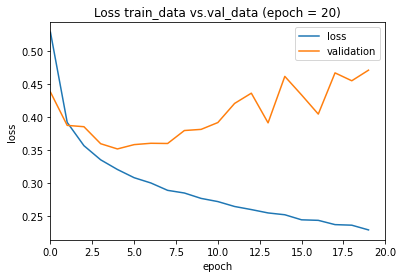

In [ ]:
# 6.3.2.3 훈련데이터와 검증데이터의 훈련 과정 손실변화 시각화 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title ('Loss train_data vs.val_data (epoch = 20)')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation'])
plt.xlim(0,20)
plt.show()

* 과대적합 발생: 훈련 데이터가 epoch = 5 까지 감소하다가 증가함.
* 훈련데이터의 손실이 증가하는 시점을 늦추는 방향으로 개선

In [ ]:
# 6.3.2.4 optimizer = 'adam'으로 훈련
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit (train_scaled, train_target, epochs=20, verbose = 0,
                     validation_data = (val_scaled, val_target))


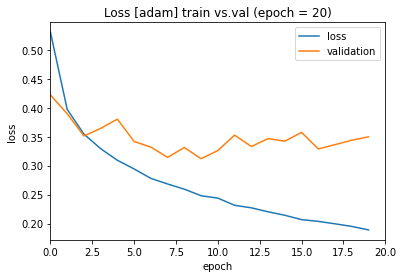

In [ ]:
# 6.3.2.3 훈련데이터와 검증데이터의 훈련 과정 손실변화 시각화 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title ('Loss [adam] train vs.val (epoch = 20)')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation'])
plt.xlim(0,20)
plt.show()

* 'adam' 훈련 결과 검증데이터의 손실이  8~9  epoch 까지 감소하는 것을 확인
* 본 모델에서는 'rmsprop' 보다 'adam'이 유리하다고 판단 할 수 있음

### 6.3.3 드롭아웃 Drop out

In [ ]:
# 6.3.3.1 Dropout=0.3 을 적용한 모델의 생성
model = model_fn(keras.layers.Dropout(0.3))  # 오버피팅 대책 dropout
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 6.3.3.2 드롭아웃 모델 훈련
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs= 20, verbose = 0,
                    validation_data = (val_scaled, val_target))


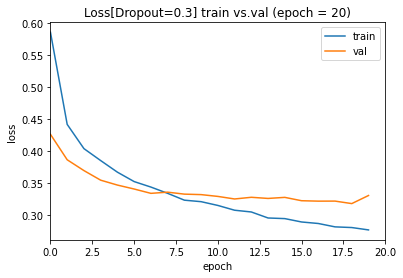

In [ ]:
# 6.3.3.3 드롭아웃 결과의 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title ('Loss[Dropout=0.3] train vs.val (epoch = 20)')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.xlim(0,20)
plt.show()

### 6.3.4 모델 저장과 복원

In [ ]:
# 6.3.4.1 dropout = 0.3, optimizer = 'adam' 으로 epoch = 10 학습 모델 생성 및 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile (optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
               metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose = 0,
                    validation_data = (val_scaled, val_target))

In [ ]:
# 6.3.4.2 훈련 결과에 대한 가중치 (= 패러미터) 저장 (HDF5)
model.save_weights('model-weights.h5')

In [ ]:
# 6.3.4.3 모델 구조와 패러미터를 함께 저장
model.save('model-whole.h5')

In [ ]:
# 6.3.4.4 저장 결과 확인
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Jul 20 03:06 model-weights.h5
-rw-r--r-- 1 root root 982664 Jul 20 03:06 model-whole.h5


In [ ]:
# 6.3.4.5 훈련되지 않은 모델을 생성 후, 가중치를 적재 (load)
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [ ]:
# 6.3.4.6 검증데이터를 이용해서 가중치를 적재한 모델로 예측을 수행
import numpy as np
# 검증 데이터 예측 결과 최대값을 갖는 인덱스 리스트 생성
val_labels = np.argmax(model.predict(val_scaled), axis =-1)

# 정답 레이블과 비교하여 정확도 산출
print (np.mean(val_labels ==val_target))

0.8744166666666666


In [ ]:
# 6.3.4.7 모델을 적재하여 정확도 산출
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3307 - accuracy: 0.8779


[0.33069589734077454, 0.877916693687439]

* 가중치만 적재한 경우와, 모델 모두 적재한 경우의 정확도가 일치한다. 

### 6.3.5 콜백

In [ ]:
# 6.3.5.1 ModelCheckpoint를 훈련시의 매개변수로 전달하여 최상의 결과일 때모델을 저장한다.  
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', 
              metrics = 'accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')

model.fit(train_scaled, train_target, epochs=20, verbose = 0, 
          validation_data = (val_scaled, val_target), 
          callbacks = [checkpoint_cb])

In [ ]:
# 6.3.5.2 콜백으로 저장한 모델의 검증 평가 
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

In [ ]:
# 6.3.5.3 Early stopping을 반영한 훈련 수행 
# 과대적합이 시작하는 시점 ( 검증 점수가 향상되지 않는 지점 부근 )에 훈련을 조기 종료

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

# 2개의 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb =keras.callbacks.EarlyStopping(patience =2, restore_best_weights =True)

# 모델 훈련
history = model.fit (train_scaled, train_target, epochs = 20, verbose = 0,
           validation_data = (val_scaled, val_target),
           callbacks = [checkpoint_cb, early_stopping_cb])

In [ ]:
# 6.3.5.4 중단 시점 확인
print(early_stopping_cb.stopped_epoch)

8


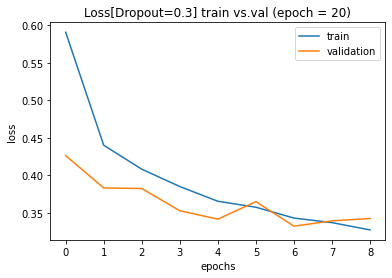

In [ ]:
# 6.3.5.5 조기중단한 훈련손실과 검증 손실 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title ('Loss[Dropout=0.3] train vs.val (epoch = 20)')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# 6.3.5.6 조기 중단한 모델의 검증세트의 성능
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3322 - accuracy: 0.8798


[0.3322083652019501, 0.8798333406448364]